$$\min_{x\in\mathbf{R}^n} c^Tx-\sum_{i=1}^m\log(b_i-a_i^T x)$$
Let $m>n$ ensure that $b-Ax>0$ is not empty.

In [7]:
# Set the seed
# np.random.seed()
import numpy as np
from functions import *
m = 1000
n = 200

A = np.random.randn(m, n)
x0 = np.random.random(n)
b = A.dot(x0) + np.random.random(m)
c = np.random.randn(n)

f = lambda x: c.dot(x)-np.sum(np.log(b-A.dot(x)))
grad_f = lambda x: c+A.T.dot(1/(b-A.dot(x)))
nabla_f = lambda x: A.T.dot(np.diag(1/(b-A.dot(x))**2)).dot(A)

dom_f = lambda x: np.all(b-A.dot(x)>0)
# n = A.shape[1]
# x = cp.Variable(n)
# objective = cp.Minimize(c.T @ x- cp.sum(cp.log(b-A @ x)))    
# constraints = [A @ x <= b]

# # Form and solve problem.
# prob = cp.Problem(objective, constraints)
# cvx_solution = prob.solve(solver="MOSEK", verbose=False)

In [8]:
v_g = gradient_descent(f, grad_f, x0.copy(), A, b, dom_f, MAXITERS=2000, TOL=1e-8, alpha=0.5, beta=0.8, print_iter=False)
v_n = newton(f, grad_f, nabla_f, x0.copy(), A, b, dom_f, MAXITERS=1000, TOL=1e-8, alpha=0.5, beta=0.8, print_iter=False)

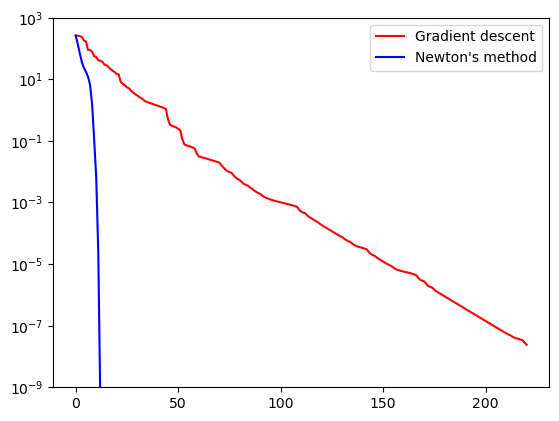

In [9]:
plot_error_iter(v_g, v_n[-1], "Gradient descent", color='r')
plot_error_iter(v_n, v_n[-1], "Newton's method")
plt.legend()
plt.yscale('log')
plt.ylim(1e-9,1e3)
plt.show()

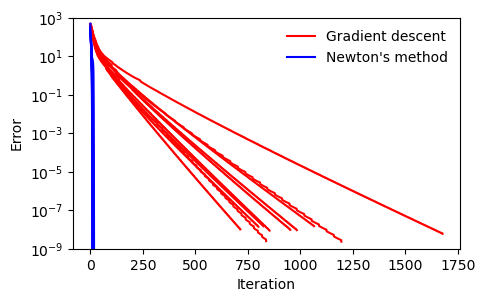

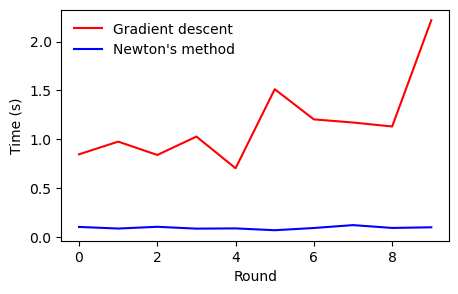

In [10]:
# # Set the seed
np.random.seed(2)
from time import time
gradient_time = []
newton_time = []
plt.figure(figsize=(5, 3))
for i in range(10):
    m = 1000
    n = 300

    A = np.random.randn(m, n)
    x0 = np.random.random(n)
    b = A.dot(x0) + np.random.random(m)
    c = np.random.randn(n)

    f = lambda x: c.dot(x)-np.sum(np.log(b-A.dot(x)))
    grad_f = lambda x: c+A.T.dot(1/(b-A.dot(x)))
    nabla_f = lambda x: A.T.dot(np.diag(1/(b-A.dot(x))**2)).dot(A)

    dom_f = lambda x: np.all(b-A.dot(x)>0)
    
    g_start = time()
    v_g = gradient_descent(f, grad_f, x0.copy(), A, b, dom_f, MAXITERS=2000, TOL=1e-8, alpha=0.01, beta=0.8, print_iter=False)
    g_end = time()
    gradient_time.append(g_end-g_start)
    n_start = time()
    v_n = newton(f, grad_f, nabla_f, x0.copy(), A, b, dom_f, MAXITERS=1000, TOL=1e-8, alpha=0.01, beta=0.8, print_iter=False)
    n_end = time()
    newton_time.append(n_end-n_start)
    plot_error_iter(v_g, v_n[-1], "Gradient descent", color='r')
    plot_error_iter(v_n, v_n[-1], "Newton's method")

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.yscale('log')
plt.ylim(1e-9,1e3)
plt.legend(['Gradient descent', "Newton's method"],frameon=False)
# plt.savefig('figure/gradient_descent_newton_%d_%d.png'%(m,n), dpi=100, bbox_inches='tight',transparent=False)
plt.show()


plt.figure(figsize=(5, 3))
plt.plot(gradient_time, label='Gradient descent', color='r')
plt.plot(newton_time, label="Newton's method", color='b')
plt.legend(frameon=False)
plt.xlabel('Round')
plt.ylabel('Time (s)')
# plt.savefig('figure/gradient_descent_newton_time_%d_%d.png'%(m,n), dpi=100, bbox_inches='tight',transparent=False)
plt.show()